In [1]:
import numpy as np
import pandas as pd
from selenium import webdriver
from webdriver_manager import chrome
from selenium.webdriver.chrome.options import Options
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [2]:
Table1=[]

In [6]:
driver=webdriver.Chrome(options=webdriver.ChromeOptions())
driver.maximize_window()
for i in range(1,35):
    link = f'https://www.grubhub.com/delivery/ny-nyc?pageNum={i}'
    driver.get(link)
    driver.implicitly_wait(15)
    sleep(2)
    driver.find_element(By.XPATH, '/html/body/ghs-site-container/span/div/div[3]/div/span/div/ghs-router-outlet/span/div/span/span[2]/div/div/div/div/div[2]/div[2]/div/div[5]/div[2]/button').click()
    driver.implicitly_wait(15)
    sleep(2)
    body=driver.find_element(By.TAG_NAME,'html')
    for dd in range(3):
        body.send_keys(Keys.PAGE_DOWN)
        driver.implicitly_wait(5)

    driver.implicitly_wait(15)
    sleep(2)
    html_snippet=driver.page_source
    soup = BeautifulSoup(html_snippet, 'html.parser')
    restaurant_cards = soup.find_all('div', class_='u-gutter-2 s-col-sm-6 s-col-md-4 s-col-lg-3 u-stack-y-4')
    k=1
    for card in restaurant_cards:
        try:
            restaurant_name = card.find('h5', class_='u-text-ellipsis').text.strip()
        except:
            restaurant_name=None
        try:
            cuisine_type = card.find('span', class_='u-text-secondary u-inline').text.strip()
        except:
            cuisine_type=None
        try:
            num_reviews_elem = card.find('span', class_='sc-dkrFOg cbuoQk')
            num_reviews = num_reviews_elem.text.strip()
        except:
            num_reviews ='Not Available'
        try:
            Half_link = card.find('a', class_='restaurant-name')['href']
            restaurant_id= Half_link.split('/')[-1]
            restaurant_link= 'https://www.grubhub.com/'+Half_link
        except:
            restaurant_id=None
            restaurant_link=None
    
        Table1.append({
        "restaurant_id"  : restaurant_id,
        "Restaurant_Name": restaurant_name,
        "Cuisine": cuisine_type,
        "Restaurant_Link":restaurant_link,
        'delivery_review_number':num_reviews
        })
        print(f"Res{k} done")
        k+=1
        sleep(0.1)
    print(f"Page{i} Done")

Res1 done
Res2 done
Res3 done
Res4 done
Res5 done
Res6 done
Res7 done
Res8 done
Res9 done
Res10 done
Res11 done
Res12 done
Res13 done
Res14 done
Res15 done
Res16 done
Res17 done
Res18 done
Res19 done
Res20 done
Res21 done
Res22 done
Res23 done
Res24 done
Res25 done
Res26 done
Res27 done
Res28 done
Res29 done
Res30 done
Res31 done
Res32 done
Res33 done
Res34 done
Res35 done
Res36 done
Page1 Done
Res1 done
Res2 done
Res3 done
Res4 done
Res5 done
Res6 done
Res7 done
Res8 done
Res9 done
Res10 done
Res11 done
Res12 done
Res13 done
Res14 done
Res15 done
Res16 done
Res17 done
Res18 done
Res19 done
Res20 done
Res21 done
Res22 done
Res23 done
Res24 done
Res25 done
Res26 done
Res27 done
Res28 done
Res29 done
Res30 done
Res31 done
Res32 done
Res33 done
Res34 done
Res35 done
Res36 done
Page2 Done
Res1 done
Res2 done
Res3 done
Res4 done
Res5 done
Res6 done
Res7 done
Res8 done
Res9 done
Res10 done
Res11 done
Res12 done
Res13 done
Res14 done
Res15 done
Res16 done
Res17 done
Res18 done
Res19 done
Res2

In [7]:
df=pd.DataFrame(Table1)

In [8]:
df.shape

(1224, 5)

In [9]:
df

,restaurant_id,Restaurant_Name,Cuisine,Restaurant_Link,delivery_review_number
0,1339940,McDonald's,American,https://www.grubhub.com//restaurant/mcdonalds-...,1554 ratings
1,2809912,Pantano's Kitchen,Hamburger,https://www.grubhub.com//restaurant/pantanos-k...,159 ratings
2,96258,Taste Cafe & Grill,Hamburger,https://www.grubhub.com//restaurant/taste-cafe...,7097 ratings
3,90278,Amsterdam Deli,Convenience,https://www.grubhub.com//restaurant/amsterdam-...,1522 ratings
4,6174448,Wendy's,Fast Food,https://www.grubhub.com//restaurant/wendys-2-w...,27 ratings
...,...,...,...,...,...
1219,5955896,Secrets,American,https://www.grubhub.com//restaurant/secrets-17...,Not Available
1220,2848224,Get Grilled Cheesin',Fast Food,https://www.grubhub.com//restaurant/get-grille...,Not Available
1221,2896998,Heaven's Burgers,Hamburger,https://www.grubhub.com//restaurant/heavens-bu...,4 ratings
1222,2262645,Caffe Aronne,Cafe,https://www.grubhub.com//restaurant/caffe-aron...,9 ratings


In [10]:
df.duplicated().sum()

856

In [11]:
df.isna().sum()

restaurant_id             0
Restaurant_Name           0
Cuisine                   1
Restaurant_Link           0
delivery_review_number    0
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)

In [13]:
df.to_csv('Data2.csv')

In [14]:
df.iloc[3]

restaurant_id                                                         90278
Restaurant_Name                                              Amsterdam Deli
Cuisine                                                         Convenience
Restaurant_Link           https://www.grubhub.com//restaurant/amsterdam-...
delivery_review_number                                         1522 ratings
Name: 3, dtype: object

In [15]:
Table2=[]

In [16]:
# driver=webdriver.Chrome(options=webdriver.ChromeOptions())
# driver.maximize_window()

# n=len(df)
# for pn in range(n):
#     page=df.iloc[pn]
#     restaurant_id=page['restaurant_id']
#     Restaurant_Name=page['Restaurant_Name']
#     pagelink=page['Restaurant_Link']
#     driver.get(pagelink)
#     driver.implicitly_wait(15)
#     sleep(5)

#     menu_items =  driver.find_elements(By.CLASS_NAME, 'menuItem')

#     print("Total Items in Menu :",len(menu_items))
    
#     for item in menu_items:
#         print('item name',item.text.split('\n')[0])
#         print('item price',item.text.split('\n')[-1])
#         print('\n\n')

In [17]:
driver=webdriver.Chrome(options=webdriver.ChromeOptions())
driver.maximize_window()

n=len(df)
for pn in range(n):
    page=df.iloc[pn]
    restaurant_id=page['restaurant_id']
    Restaurant_Name=page['Restaurant_Name']
    delivery_review_number=page['delivery_review_number']
    pagelink=page['Restaurant_Link']
    driver.get(pagelink)
    driver.implicitly_wait(15)
    sleep(5)
    location =driver.find_element(By.XPATH,'//*[@id="menu-header"]/div/div/div[2]/div[2]/div/div[1]/button')
    html_content=driver.page_source
    soup = BeautifulSoup(html_content, 'html.parser')

    category_label = None

    div_elements = soup.find_all('div', {'data-index': True})
    print('total items:' ,len(div_elements))


    for div in soup.find_all('div', {'data-index': True}):
        try:
            category_label = div.find('h3', {'class': 'menuSection-title'}).text.strip()
        except AttributeError:
            pass  

        menu_item_containers = div.find_all('div', {'data-testid': 'menu-item'})

        for menu_item_container in menu_item_containers:
            try:
                item_name =  menu_item_container.find('h6', class_='sc-dkrFOg').text.strip()
                item_price = menu_item_container.find('span', {'data-testid': 'menu-item-price'}).text.strip()
                Table2.append({
                    'restaurant_id' :restaurant_id,
                    'Restaurant_Name':Restaurant_Name,
                    'location' : location.text,
                    'dish_category': category_label,
                    'Dish_name': item_name,
                    'price': item_price,
                    'delivery_review_number':delivery_review_number
                })
            except AttributeError:
    
                pass
    print("Restaurant",pn,"Done")

total items: 26
Restaurant 0 Done
total items: 29
Restaurant 1 Done
total items: 0
Restaurant 2 Done
total items: 0
Restaurant 3 Done
total items: 24
Restaurant 4 Done
total items: 0
Restaurant 5 Done
total items: 0
Restaurant 6 Done
total items: 0
Restaurant 7 Done
total items: 0
Restaurant 8 Done
total items: 0
Restaurant 9 Done
total items: 0
Restaurant 10 Done
total items: 0
Restaurant 11 Done
total items: 0
Restaurant 12 Done
total items: 0
Restaurant 13 Done
total items: 0
Restaurant 14 Done
total items: 0
Restaurant 15 Done
total items: 0
Restaurant 16 Done
total items: 0
Restaurant 17 Done
total items: 0
Restaurant 18 Done
total items: 0
Restaurant 19 Done
total items: 0
Restaurant 20 Done
total items: 0
Restaurant 21 Done
total items: 0
Restaurant 22 Done
total items: 0
Restaurant 23 Done
total items: 0
Restaurant 24 Done
total items: 0
Restaurant 25 Done
total items: 0
Restaurant 26 Done
total items: 0
Restaurant 27 Done
total items: 0
Restaurant 28 Done
total items: 0
Restau

In [126]:
print(len(Table2))

7355


In [128]:
df1=pd.DataFrame(Table2)
df1

In [129]:
df1.duplicated().sum()

1473

In [130]:
df1.drop_duplicates(inplace=True)

In [131]:
df1.shape

(5882, 7)

In [132]:
df1.to_csv("Table2_data.csv")

In [1]:
import pandas as pd
import numpy as np

In [2]:
table1 = pd.read_csv("C:/Users/sansk/OneDrive/Documents/Table1_data.csv")

In [3]:
table1.head()

,restaurant_id,Restaurant_Name,Cuisine,Restaurant_Link,delivery_review_number
0,6040304,Chipotle,Taco,https://www.grubhub.com//restaurant/chipotle-1...,28 ratings
1,3329217,Panda King,Chinese,https://www.grubhub.com//restaurant/panda-king...,1375 ratings
2,312813,Veselka,Breakfast,https://www.grubhub.com//restaurant/veselka-14...,3403 ratings
3,277977,Spring Garden,Chinese,https://www.grubhub.com//restaurant/spring-gar...,3297 ratings
4,346047,Fields Good Chicken,Salad,https://www.grubhub.com//restaurant/fields-goo...,1424 ratings


In [4]:
table1.shape

(1224, 5)

In [5]:
table1.drop_duplicates(inplace=True)

In [6]:
table1.isnull().sum()

restaurant_id             0
Restaurant_Name           0
Cuisine                   1
Restaurant_Link           0
delivery_review_number    0
dtype: int64

In [7]:
table1.dropna(inplace=True)

In [8]:
table1.isnull().sum()

restaurant_id             0
Restaurant_Name           0
Cuisine                   0
Restaurant_Link           0
delivery_review_number    0
dtype: int64

In [9]:
table2 = pd.read_csv("C:/Users/sansk/OneDrive/Documents/Table2_data.csv")

In [10]:
table2.head()

,Unnamed: 0,restaurant_id,Restaurant_Name,location,dish_category,Dish_name,price,delivery_review_number
0,0,6040304,Chipotle,1004 Flatbush Ave,Entrees,Burrito,$14.45+,28 ratings
1,1,6040304,Chipotle,1004 Flatbush Ave,Entrees,Burrito Bowl,$14.45+,28 ratings
2,2,6040304,Chipotle,1004 Flatbush Ave,Entrees,Quesadilla,$15.15+,28 ratings
3,3,6040304,Chipotle,1004 Flatbush Ave,Entrees,Salad,$14.45+,28 ratings
4,4,6040304,Chipotle,1004 Flatbush Ave,Entrees,Tacos,$4.75,28 ratings


In [11]:
table2.duplicated().sum()

0

In [12]:
table2.isnull().sum()

Unnamed: 0                0
restaurant_id             0
Restaurant_Name           0
location                  0
dish_category             0
Dish_name                 0
price                     0
delivery_review_number    0
dtype: int64

In [13]:
df = pd.merge(table1, table2, on='restaurant_id')

In [14]:
df.head()

,restaurant_id,Restaurant_Name_x,Cuisine,Restaurant_Link,delivery_review_number_x,Unnamed: 0,Restaurant_Name_y,location,dish_category,Dish_name,price,delivery_review_number_y
0,6040304,Chipotle,Taco,https://www.grubhub.com//restaurant/chipotle-1...,28 ratings,0,Chipotle,1004 Flatbush Ave,Entrees,Burrito,$14.45+,28 ratings
1,6040304,Chipotle,Taco,https://www.grubhub.com//restaurant/chipotle-1...,28 ratings,1,Chipotle,1004 Flatbush Ave,Entrees,Burrito Bowl,$14.45+,28 ratings
2,6040304,Chipotle,Taco,https://www.grubhub.com//restaurant/chipotle-1...,28 ratings,2,Chipotle,1004 Flatbush Ave,Entrees,Quesadilla,$15.15+,28 ratings
3,6040304,Chipotle,Taco,https://www.grubhub.com//restaurant/chipotle-1...,28 ratings,3,Chipotle,1004 Flatbush Ave,Entrees,Salad,$14.45+,28 ratings
4,6040304,Chipotle,Taco,https://www.grubhub.com//restaurant/chipotle-1...,28 ratings,4,Chipotle,1004 Flatbush Ave,Entrees,Tacos,$4.75,28 ratings


In [19]:
df = df[['restaurant_id', 'Restaurant_Link', 'Restaurant_Name_x','Cuisine','location','dish_category','Dish_name','price','delivery_review_number_y']]

In [23]:
df.head()

,restaurant_id,Restaurant_Link,Restaurant_Name_x,Cuisine,location,dish_category,Dish_name,price,delivery_review_number_y
0,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Burrito,$14.45+,28 ratings
1,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Burrito Bowl,$14.45+,28 ratings
2,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Quesadilla,$15.15+,28 ratings
3,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Salad,$14.45+,28 ratings
4,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Tacos,$4.75,28 ratings


In [24]:
df.rename(columns={'Restaurant_Name_x': 'Restaurant_Name'}, inplace=True)
df.rename(columns={'delivery_review_number_y': 'delivery_review_number'}, inplace=True)

C:\Users\sansk\AppData\Local\Temp\ipykernel_18596\1952838416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Restaurant_Name_x': 'Restaurant_Name'}, inplace=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_18596\1952838416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'delivery_review_number_y': 'delivery_review_number'}, inplace=True)


In [25]:
df.head()

,restaurant_id,Restaurant_Link,Restaurant_Name,Cuisine,location,dish_category,Dish_name,price,delivery_review_number
0,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Burrito,$14.45+,28 ratings
1,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Burrito Bowl,$14.45+,28 ratings
2,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Quesadilla,$15.15+,28 ratings
3,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Salad,$14.45+,28 ratings
4,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Tacos,$4.75,28 ratings


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 5881
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   restaurant_id           5882 non-null   int64 
 1   Restaurant_Link         5882 non-null   object
 2   Restaurant_Name         5882 non-null   object
 3   Cuisine                 5882 non-null   object
 4   location                5882 non-null   object
 5   dish_category           5882 non-null   object
 6   Dish_name               5882 non-null   object
 7   price                   5882 non-null   object
 8   delivery_review_number  5882 non-null   object
dtypes: int64(1), object(8)
memory usage: 459.5+ KB


In [28]:
df['delivery_review_number'] = df['delivery_review_number'].str.replace('ratings', '', regex=True)
df['delivery_review_number'] = df['delivery_review_number'].str.replace('Not Available', '0', regex=True)

C:\Users\sansk\AppData\Local\Temp\ipykernel_18596\526436746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_review_number'] = df['delivery_review_number'].str.replace('ratings', '', regex=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_18596\526436746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_review_number'] = df['delivery_review_number'].str.replace('Not Available', '0', regex=True)


In [29]:
df.head(1)

,restaurant_id,Restaurant_Link,Restaurant_Name,Cuisine,location,dish_category,Dish_name,price,delivery_review_number
0,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Burrito,$14.45+,28


In [100]:
df['price'] = df['price'].str.replace('[\$\s+]', '', regex=True).astype(float)

In [31]:
df.columns

Index(['restaurant_id', 'Restaurant_Link', 'Restaurant_Name', 'Cuisine',
       'location', 'dish_category', 'Dish_name', 'price',
       'delivery_review_number'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 5881
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   restaurant_id           5882 non-null   int64  
 1   Restaurant_Link         5882 non-null   object 
 2   Restaurant_Name         5882 non-null   object 
 3   Cuisine                 5882 non-null   object 
 4   location                5882 non-null   object 
 5   dish_category           5882 non-null   object 
 6   Dish_name               5882 non-null   object 
 7   price                   5882 non-null   float64
 8   delivery_review_number  5882 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 436.6+ KB


In [34]:
df['delivery_review_number'] = df['delivery_review_number'].astype(int)

C:\Users\sansk\AppData\Local\Temp\ipykernel_18596\927522728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_review_number'] = df['delivery_review_number'].astype(int)


In [36]:
df

,restaurant_id,Restaurant_Link,Restaurant_Name,Cuisine,location,dish_category,Dish_name,price,delivery_review_number
0,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Burrito,14.45,28
1,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Burrito Bowl,14.45,28
2,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Quesadilla,15.15,28
3,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Salad,14.45,28
4,6040304,https://www.grubhub.com//restaurant/chipotle-1...,Chipotle,Taco,1004 Flatbush Ave,Entrees,Tacos,4.75,28
...,...,...,...,...,...,...,...,...,...
5877,1226782,https://www.grubhub.com//restaurant/tokyo-sush...,Tokyo Sushi,Sushi,3704 Ditmars Blvd,Regular Sushi Rolls,Peanut avocado roll,4.95,25
5878,1226782,https://www.grubhub.com//restaurant/tokyo-sush...,Tokyo Sushi,Sushi,3704 Ditmars Blvd,Chef's Specials,Chicken Teriyaki,15.95,25
5879,1226782,https://www.grubhub.com//restaurant/tokyo-sush...,Tokyo Sushi,Sushi,3704 Ditmars Blvd,Chef's Specials,Steak Teriyaki,16.95,25
5880,1226782,https://www.grubhub.com//restaurant/tokyo-sush...,Tokyo Sushi,Sushi,3704 Ditmars Blvd,Chef's Specials,Salmon and Shrimp Teriyaki,18.95,25


In [49]:
num_col = df.select_dtypes(include=['float','int']).columns

In [50]:
cat_col = df.select_dtypes(include=['object']).columns

In [51]:
for i in cat_col:
    unique_val = df[i].unique()
    print(i ,':' , unique_val,'\n')

Restaurant_Link : ['https://www.grubhub.com//restaurant/chipotle-1004-flatbush-ave-brooklyn/6040304'
 'https://www.grubhub.com//restaurant/chomp-chomp-thai-kitchen-78-e-1st-st-new-york/4718024'
 'https://www.grubhub.com//restaurant/two-boots-upper-east-side-1243-2nd-ave-new-york/5400000'
 'https://www.grubhub.com//restaurant/brooklyn-wing-house---cambria-heights-227-01-linden-blvd-queens/3287353'
 'https://www.grubhub.com//restaurant/paesano-of-mulberry-street-136-mulberry-st-new-york/2667997'
 'https://www.grubhub.com//restaurant/two-hands-corn-dog---soho-250-mott-st-250-mott-st-new-york/2762082'
 'https://www.grubhub.com//restaurant/bear-burgers-8923-flatlands-ave-brooklyn/3049574'
 'https://www.grubhub.com//restaurant/zio-pepes-pizzeria-26-19-23rd-ave-new-york/6528568'
 'https://www.grubhub.com//restaurant/jagerhause-german-restaurant-1516-149th-st-whitestone/1104089'
 'https://www.grubhub.com//restaurant/beach-cafe-1326-2nd-ave-new-york/356819'
 'https://www.grubhub.com//restaurant

In [52]:
 for i in df:
        if df[i].dtypes!='object' and i not in ['stroke','hypertension','heart_disease']:
            q1= df[i].quantile(0.25)
            q3= df[i].quantile(0.75)
            iqr=(q3-q1)
            ul= q3+(1.5*iqr)
            ll= q1-(1.5*iqr)
            df = df[(df[i]>=ll)&(df[i]<=ul)]

In [55]:
df.shape

(4253, 9)

In [54]:
threshold = 3
for i in num_col:
    z_scores = np.abs((df[i] - df[i].mean()) / df[i].std())
    df = df[z_scores <= threshold]

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

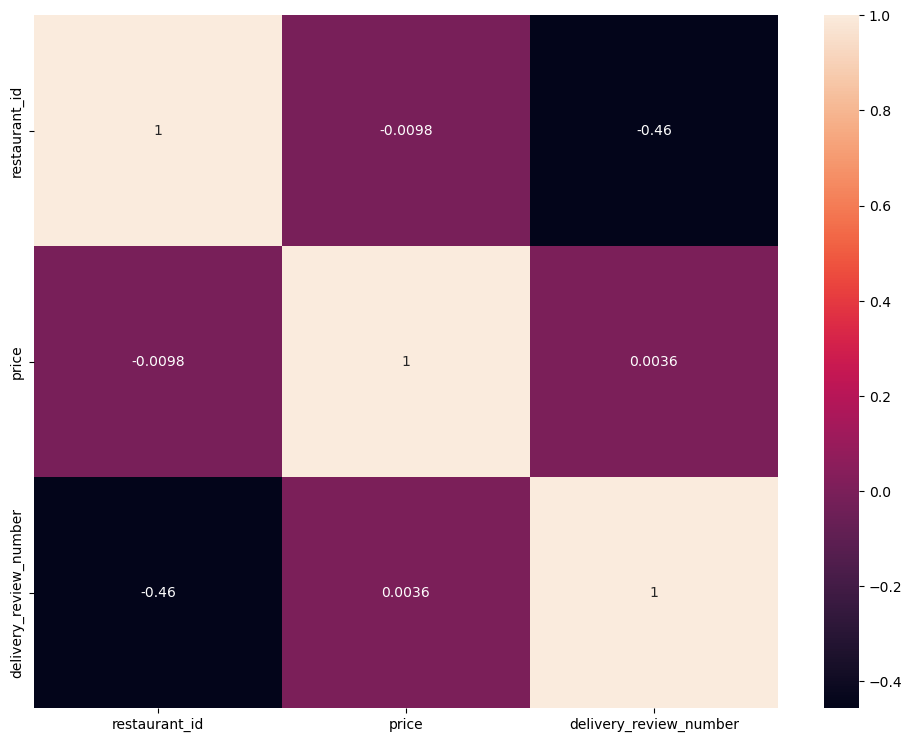

In [57]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder = LabelEncoder()
for i in cat_col:
    df[i] = label_encoder.fit_transform(df[i])

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
df[num_col] = sc.fit_transform(df[num_col])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score

In [64]:
df.columns

Index(['restaurant_id', 'Restaurant_Link', 'Restaurant_Name', 'Cuisine',
       'location', 'dish_category', 'Dish_name', 'price',
       'delivery_review_number'],
      dtype='object')

In [65]:
drop_columns = ['Restaurant_Link']
df.drop(columns=drop_columns, inplace=True)

In [69]:
df.head(1)

,restaurant_id,Restaurant_Name,Cuisine,location,dish_category,Dish_name,price,delivery_review_number
0,1.204639,25,34,0,153,886,293,0.298978


In [70]:
label_encoder = LabelEncoder()
df['price'] = label_encoder.fit_transform(df['price'])

In [71]:
X = df.drop('price', axis=1)
y = df['price']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [75]:
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

In [76]:
lr_predictions

array([231.22740081, 190.0862061 , 227.03504245, 184.87598569,
       195.27516324, 209.27800531, 195.37872369, 229.84208788,
       214.53100674, 195.32136907, 203.17140021, 210.80962399,
       218.25586796, 210.42492727, 209.29305653, 230.28176021,
       208.14487527, 199.97799731, 180.33863408, 209.26481569,
       241.56339697, 198.90253012, 199.81835583, 200.20531919,
       198.22499115, 214.93662767, 199.00494784, 207.05922151,
       198.42996796, 213.57899635, 207.39642731, 207.78694576,
       215.46449464, 224.04529735, 186.1274617 , 199.37847457,
       223.143409  , 201.85808423, 193.63216281, 193.23282375,
       211.08697443, 210.34455137, 187.70356368, 213.71236665,
       197.98678207, 207.88123033, 183.76395109, 211.1925772 ,
       200.73290077, 198.31095611, 204.54045409, 224.16258632,
       209.088761  , 204.98946811, 182.5433541 , 218.16074922,
       233.22943444, 215.75484335, 226.90535763, 194.23888232,
       204.20669398, 218.18402456, 221.81832211, 190.54

In [77]:
lr_mse

10833.76957522306

In [79]:
r2 = r2_score(y_test, lr_predictions)

In [80]:
r2

0.02037653188195787

In [83]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\Users\sansk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
logistic_predictions = logistic_model.predict(X_test)

In [86]:
logistic_mse = mean_squared_error(y_test, logistic_predictions)

In [87]:
logistic_mse

15079.047003525264

In [88]:
r2 = r2_score(y_test, logistic_predictions)

In [89]:
r2

-0.36349478535076285

In [90]:
class_report = classification_report(y_test, logistic_predictions)

C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [92]:
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         8
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         7
          34       0.00      0.00      0.00         3
          35       0.00    

In [93]:
random_model = RandomForestClassifier(random_state=42)
random_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
r_pred = random_model.predict(X_test)

In [95]:
r_accuracy = accuracy_score(y_test,r_pred)
r_repo = classification_report(y_test, r_pred)

C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sansk\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [96]:
r_accuracy

0.3325499412455934

In [97]:
r2 = r2_score(y_test, r_pred)

In [98]:
r2

0.5784431751784971

In [99]:
print(r_repo)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.67      1.00      0.80         2
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          13       1.00      0.50      0.67         4
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         0
          20       0.50      0.33      0.40         3
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         0
          24       0.50      0.50      0.50         2
          25       0.50      0.38      0.43         8
          28       0.00    

In [37]:
df.to_csv('grubhub_data.csv', index=False)